In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc,  font_manager
import matplotlib
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
fontname = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=fontname).get_name()
rc('font', family=font_name)

In [3]:
kini_data = pd.read_excel('data/ORG/경락가격/애호박/애호박 월별 총거래물량(원본).xlsx', index_col=None)

In [4]:
len(kini_data)

39739

In [5]:
seoul_data = kini_data[kini_data['시장명'] == '서울']
busan_data = kini_data[kini_data['시장명'] == '부산']
daegu_data = kini_data[kini_data['시장명'] == '대구']
daejeon_data = kini_data[kini_data['시장명'] == '대전']
gwangju_data = kini_data[kini_data['시장명'] == '광주']

In [6]:
seoul_data = seoul_data.sort_index(ascending=False)

In [7]:
seoul_date = seoul_data['DATE'].unique()
seoul_date

array(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
       '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
       '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06',
       '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12',
       '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06',
       '2023-07', '2023-08'], dtype=object)

In [8]:
seoul_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10202 entries, 39738 to 29537
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       10202 non-null  object 
 1   거래단위       10202 non-null  object 
 2   평균가격(원)    10202 non-null  object 
 3   총거래물량(kg)  10202 non-null  float64
 4   총거래금액(원)   10202 non-null  int64  
 5   시장명        10202 non-null  object 
 6   법인명        10202 non-null  object 
 7   품목명        10202 non-null  object 
 8   품종명        10202 non-null  object 
 9   산지명        10202 non-null  object 
 10  산지시군명      10202 non-null  object 
 11  등급명        10202 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 1.0+ MB


In [9]:
seoul_list = []
for i in seoul_date:
    seoul_sum1 = seoul_data.loc[seoul_data['DATE']==i, '총거래물량(kg)'].values
    seoul_sum2 = seoul_data.loc[seoul_data['DATE']==i, '총거래금액(원)'].values
    seoul_list.append([i, seoul_sum1.sum(), seoul_sum2.sum()])

In [10]:
seoul_df = pd.DataFrame(seoul_list, columns=['DATE', '총거래물량', '총거래금액'])

In [11]:
seoul_df

,DATE,총거래물량,총거래금액
0,2020-01,2780377.65,9830108400
1,2020-02,2720669.88,9024401700
2,2020-03,3739541.28,9722242800
3,2020-04,5703989.95,7969557560
4,2020-05,5487463.43,7107073600
5,2020-06,5435012.79,6912510040
6,2020-07,4369081.64,6969965000
7,2020-08,3399364.19,10140301900
8,2020-09,4424172.16,13495784500
9,2020-10,5212849.56,6208943600


In [12]:
seoul_df.to_csv('data/다시 정제.csv', index=False, encoding='UTF-8')

In [13]:
print(seoul_df['총거래금액'][1]/seoul_df['총거래물량'][1])

3316.9778392959606


In [14]:
seoul_df['평균거래금액'] = seoul_df['총거래금액']/seoul_df['총거래물량']

In [15]:
# seoul_df.to_csv('data/일단 다시 정제.csv', index=False, encoding='UTF-8')

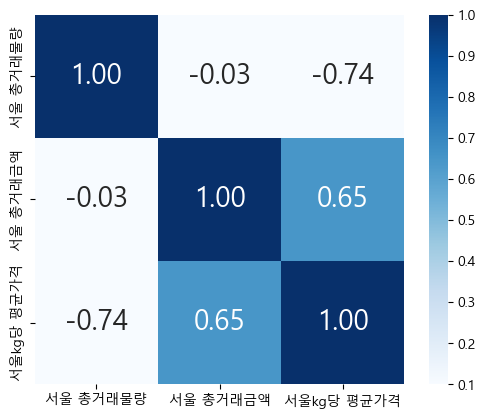

In [19]:
list = [seoul_df['총거래물량'], seoul_df['총거래금액'], seoul_df['평균거래금액']]
column_names = ['서울 총거래물량', '서울 총거래금액', '서울kg당 평균가격']
df1 = pd.DataFrame(list).T
df1.columns = column_names
corr=df1.corr()

corr_heatmap = sns.heatmap( corr, 
                           cbar=True, 
                           annot=True, 
                           annot_kws={'size': 20}, 
                           fmt='.2f', 
                           square=True, 
                           cmap='Blues',
                           vmin=0.1,
                           vmax=1
)

plt.savefig('data/평균금액 거래물량 거래금액 상관관계.png')

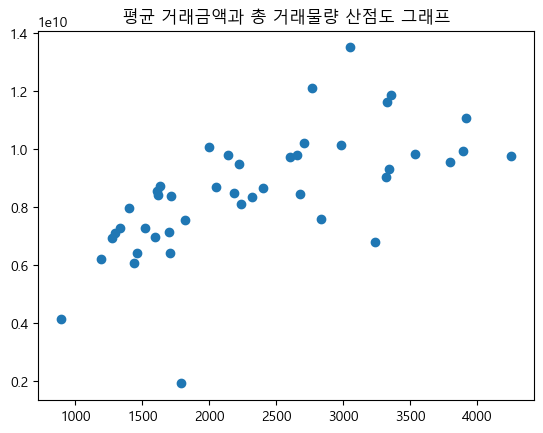

In [17]:
plt.scatter(seoul_df['평균거래금액'], seoul_df['총거래금액'])
plt.title('평균 거래금액과 총 거래물량 산점도 그래프')
plt.savefig('data/평균 거래금액과 총거래금액 산점도 그래프.png')
plt.show()

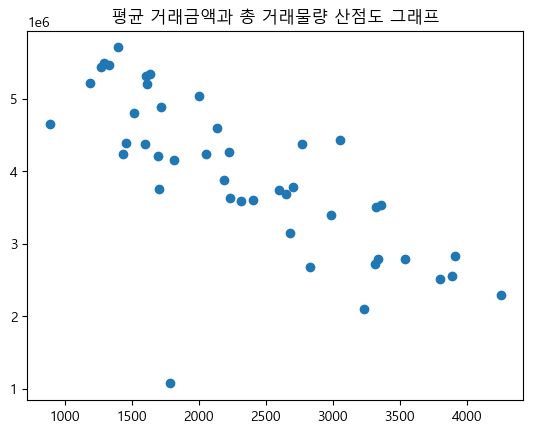

In [18]:
plt.scatter(seoul_df['평균거래금액'], seoul_df['총거래물량'])
plt.title('평균 거래금액과 총 거래물량 산점도 그래프')
plt.savefig('data/평균 거래금액과 총 거래물량 산점도 그래프.png')
plt.show()